In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

In [2]:
##PC:
path = r'C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Yearly point extraction data' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  ## more options can be specified also
#     print(df)

df

# print(df.iloc[100,])

# for col in df.columns:
#     print(col)

,B1,B2,B3,B4,B5,B6,B7,flats,system:index,latitude,...,Replicate,Year,speciesName,locationID,liveMass,Transect,longitude,collectDate,B10,B11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.395746,...,a,2000,Spartina alterniflora,1,841.6,B,-75.876094,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,37.395746,...,b,2000,Spartina alterniflora,1,214.4,B,-75.876094,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,37.395746,...,a,2000,Spartina alterniflora,1,963.2,C,-75.876094,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,37.395746,...,b,2000,Spartina alterniflora,1,0.0,C,-75.876094,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,37.395746,...,a,2000,Spartina alterniflora,1,841.6,A,-75.876094,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,0.0436,0.0621,0.0666,0.1545,0.1194,0.2973,0.0595,0.000065,189,37.481998,...,a,1999,Spartina alterniflora,3,0.0,B,-75.819360,NaN,NaN,NaN
1860,0.0395,0.0579,0.0567,0.1117,0.0808,0.2964,0.0522,0.012653,190,37.481998,...,a,1999,Spartina alterniflora,1,129.6,C,-75.819360,NaN,NaN,NaN
1861,0.0395,0.0498,0.0470,0.1389,0.1169,0.2964,0.0631,0.000299,191,37.481998,...,a,1999,Spartina alterniflora,2,388.8,C,-75.819360,NaN,NaN,NaN
1862,0.0395,0.0498,0.0470,0.1389,0.1169,0.2964,0.0631,0.000299,192,37.481998,...,b,1999,Spartina alterniflora,2,315.2,C,-75.819360,NaN,NaN,NaN


In [3]:
##Bands and indices
df['Sensor'] = np.where(df['Year']<2013, 'Landsat 5', 'Landsat 8') ##make sure no other sensors are being used

df.loc[df['Year'] == 2012, 'Sensor'] = 'Landsat 7'

df['ndvi'] = np.where(df['Sensor'] == 'Landsat 8', (df['B5']-df['B4'])/(df['B5']+df['B4']), \
                      (df['B4']-df['B3'])/(df['B4']+df['B3'])) ##ndvi conditional based on whether sensor is Landsat-5 or 8

df['Blue_band'] = np.where(df['Sensor'] == 'Landsat 8', df['B2'], df['B1'])
df['Green_band'] = np.where(df['Sensor'] == 'Landsat 8', df['B3'], df['B2'])
df['Red_band'] = np.where(df['Sensor'] == 'Landsat 8', df['B4'], df['B3'])
df['NIR_band'] = np.where(df['Sensor'] == 'Landsat 8', df['B5'], df['B4'])
df['SWIR1_band'] = np.where(df['Sensor'] == 'Landsat 8', df['B6'], df['B5'])
df['SWIR2_band'] = np.where(df['Sensor'] == 'Landsat 8', df['B7'], df['B7'])

##Variables from Byrd et al. 2018 (make sure calculations are accurate):
df['savi'] = ((df['NIR_band']-df['Red_band'])*1.5)/(df['NIR_band']+df['Red_band']+0.5)
df['wdrvi5'] = (0.5*df['NIR_band']-df['Red_band'])/(0.5*df['NIR_band']+df['Red_band'])
df['nd_r_g'] = (df['Red_band']-df['Green_band'])/(df['Red_band']+df['Green_band'])
df['nd_g_b'] = (df['Green_band']-df['Blue_band'])/(df['Green_band']+df['Blue_band'])
df['nd_swir2_nir'] = (df['SWIR2_band']-df['NIR_band'])/(df['SWIR2_band']+df['NIR_band'])
df['nd_swir2_r'] = (df['SWIR2_band']-df['Red_band'])/(df['SWIR2_band']+df['Red_band'])

df

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(df)

,B1,B2,B3,B4,B5,B6,B7,flats,system:index,marshName,...,NIR_band,SWIR1_band,SWIR2_band,savi,wdrvi5,nd_r_g,nd_g_b,nd_swir2_nir,nd_swir2_r,ident
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Box Tree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.507147
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Box Tree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.507147
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Box Tree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.507143
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Box Tree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.507143
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Box Tree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.507152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,0.0436,0.0621,0.0666,0.1545,0.1194,0.2973,0.0595,0.000065,189,Woodland Farm,...,0.1545,0.1194,0.0595,0.182846,0.074035,0.034965,0.175024,-0.443925,-0.056305,1998.505641
1860,0.0395,0.0579,0.0567,0.1117,0.0808,0.2964,0.0522,0.012653,190,Woodland Farm,...,0.1117,0.0808,0.0522,0.123429,-0.007552,-0.010471,0.188912,-0.363026,-0.041322,1998.505646
1861,0.0395,0.0498,0.0470,0.1389,0.1169,0.2964,0.0631,0.000299,191,Woodland Farm,...,0.1389,0.1169,0.0631,0.200977,0.192787,-0.028926,0.115342,-0.375248,0.146231,1998.505647
1862,0.0395,0.0498,0.0470,0.1389,0.1169,0.2964,0.0631,0.000299,192,Woodland Farm,...,0.1389,0.1169,0.0631,0.200977,0.192787,-0.028926,0.115342,-0.375248,0.146231,1998.505647


In [4]:
# df = df[df['ndvi'].notna()] ##later?
# df['siteName'] = df['site_id'].copy()

# display(df)
# for col in df.columns:
#     print(col)

In [5]:
##Average plot value (grouped, more or less, by lat/long, for each year)

# va_means = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Average biomass/va_meanmass.csv')
# display(va_means)

# df_first = pd.merge(df, va_means)
# df_first ##n is boiled down to 92 here - at first glance it looks correct, but make sure it is!


In [6]:
##Daymet data; yearly average
path2 = r'C:/Users/arj26323/Documents/Data/Biomass datasets/Daymet/VA/Yearly averages' 
all_files2 = glob.glob(path2 + "/*.csv")

li = []

for filename in all_files2:
    dm = pd.read_csv(filename, index_col=None, header=0)
    li.append(dm)

dm = pd.concat(li, axis=0, ignore_index=True)

dm.rename(columns={'site_id':'siteName'}, inplace=True)
dm = dm.drop(columns=['latitude','longitude'])

# dm['ident'] = dm['Latitude']/dm['Longitude']

dm['ident'] = dm['Latitude'] / dm['Longitude'] + dm['Year'] ##Just crazy enough that it might work

display(dm)

##Seasonal averages: growing season (defined as between 3/1 and 10/31)
path3 = r'C:/Users/arj26323/Documents/Data/Biomass datasets/Daymet/VA/Growing season' 
all_files3 = glob.glob(path2 + "/*.csv")

li = []

for filename in all_files3:
    dm2 = pd.read_csv(filename, index_col=None, header=0)
    li.append(dm2)

dm2 = pd.concat(li, axis=0, ignore_index=True)

dm2['ident'] = dm2['Latitude']/dm2['Longitude']

dm2 = dm2.rename(
    columns={
        'dayl': 'sn_dayl', 'prcp': 'sn_prcp', 'srad': 'sn_srad','tmax': 'sn_tmax','tmin': 'sn_tmin','vp': 'sn_vp', 
        'swe': 'sn_swe'
    }
)

display(dm2)

,dayl,prcp,srad,swe,tmax,tmin,vp,system:index,marshName,siteName,...,Code,Longitude,monitoringPurpose,Replicate,Year,speciesName,locationID,liveMass,Transect,ident
0,43225.171875,3.546236,311.112579,0.000000,20.336401,10.515385,1439.916382,0,Box Tree,Box_Tree,...,BTCC,-75.876056,EOYB,b,1999,Spartina alterniflora,1,0.00,C,1998.507143
1,43225.171875,3.555687,311.353333,0.000000,20.326044,10.495000,1437.849121,1,Box Tree,Box_Tree,...,BTC2,-75.877045,EOYB,b,1999,Spartina alterniflora,3,272.48,C,1998.507144
2,43225.171875,3.546236,311.112579,0.000000,20.336401,10.515385,1439.916382,2,Box Tree,Box_Tree,...,BTDC,-75.875969,EOYB,b,1999,Spartina alterniflora,1,0.00,D,1998.507139
3,43225.171875,3.555687,311.353333,0.000000,20.326044,10.495000,1437.849121,3,Box Tree,Box_Tree,...,BTAC,-75.876249,EOYB,b,1999,Spartina alterniflora,1,0.00,A,1998.507152
4,43225.171875,3.555687,311.353333,0.000000,20.326044,10.495000,1437.849121,4,Box Tree,Box_Tree,...,BTA3,-75.878189,EOYB,b,1999,Spartina alterniflora,4,0.00,A,1998.507153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,43225.062500,3.305769,310.027924,0.000000,20.746950,11.474368,1548.789673,32,Oyster,Oyster,...,OSBC,-75.929133,EOYB,b,2017,Spartina alterniflora,1,480.00,B,2016.508916
1860,43225.062500,3.305769,310.027924,0.000000,20.746950,11.474368,1548.789673,33,Oyster,Oyster,...,OSBC,-75.929133,EOYB,a,2017,Spartina alterniflora,1,402.88,B,2016.508916
1861,43224.957031,3.342610,307.995300,0.000000,21.011868,11.759917,1576.207886,34,Gator Tract,Gator,...,GTC2,-75.944280,EOYB,a,2017,Spartina alterniflora,3,42.72,C,2016.510592
1862,43225.171875,3.430330,303.402832,1.031209,20.270796,11.017665,1547.654297,0,Box Tree,Box_Tree,...,BTCC,-75.876056,EOYB,a,2018,Spartina alterniflora,1,255.04,C,2017.507143


,sn_dayl,sn_prcp,sn_srad,sn_swe,sn_tmax,sn_tmin,sn_vp,system:index,latitude,marshName,...,Longitude,monitoringPurpose,Replicate,Year,speciesName,locationID,liveMass,Transect,longitude,ident
0,43225.171875,3.546236,311.112579,0.000000,20.336401,10.515385,1439.916382,0,37.395746,Box Tree,...,-75.876056,EOYB,b,1999,Spartina alterniflora,1,0.00,C,-75.876094,-0.492857
1,43225.171875,3.555687,311.353333,0.000000,20.326044,10.495000,1437.849121,1,37.395746,Box Tree,...,-75.877045,EOYB,b,1999,Spartina alterniflora,3,272.48,C,-75.876094,-0.492856
2,43225.171875,3.546236,311.112579,0.000000,20.336401,10.515385,1439.916382,2,37.395746,Box Tree,...,-75.875969,EOYB,b,1999,Spartina alterniflora,1,0.00,D,-75.876094,-0.492861
3,43225.171875,3.555687,311.353333,0.000000,20.326044,10.495000,1437.849121,3,37.395746,Box Tree,...,-75.876249,EOYB,b,1999,Spartina alterniflora,1,0.00,A,-75.876094,-0.492848
4,43225.171875,3.555687,311.353333,0.000000,20.326044,10.495000,1437.849121,4,37.395746,Box Tree,...,-75.878189,EOYB,b,1999,Spartina alterniflora,4,0.00,A,-75.876094,-0.492847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,43225.062500,3.305769,310.027924,0.000000,20.746950,11.474368,1548.789673,32,37.287549,Oyster,...,-75.929133,EOYB,b,2017,Spartina alterniflora,1,480.00,B,-75.929133,-0.491084
1860,43225.062500,3.305769,310.027924,0.000000,20.746950,11.474368,1548.789673,33,37.287549,Oyster,...,-75.929133,EOYB,a,2017,Spartina alterniflora,1,402.88,B,-75.929133,-0.491084
1861,43224.957031,3.342610,307.995300,0.000000,21.011868,11.759917,1576.207886,34,37.167409,Gator Tract,...,-75.944280,EOYB,a,2017,Spartina alterniflora,3,42.72,C,-75.940586,-0.489408
1862,43225.171875,3.430330,303.402832,1.031209,20.270796,11.017665,1547.654297,0,37.395746,Box Tree,...,-75.876056,EOYB,a,2018,Spartina alterniflora,1,255.04,C,-75.876094,-0.492857


In [7]:
##Loading elevation data

elev_10m = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Point elevation/VA_DEM_vals_10m.csv')

elev_10m.rename(columns={'first':'Elevation'}, inplace=True)
elev_10m.rename(columns={'site_id':'siteName'}, inplace=True)

elev_10m['ident'] = elev_10m['Latitude'] / elev_10m['Longitude'] + elev_10m['Year'] ##Just crazy enough that it might work

print(len(elev_10m['Elevation'].unique()))

display(elev_10m) ##More data here than other datasets

153


,Elevation,system:index,latitude,marshName,siteName,Latitude,Code,Longitude,monitoringPurpose,Replicate,Year,speciesName,locationID,liveMass,Transect,longitude,ident
0,0.957294,0,37.395746,Box Tree,Box_Tree,37.396051,BTCC,-75.876056,EOYB,b,1999,Spartina alterniflora,1,0.00,C,-75.876094,1998.507143
1,0.967578,1,37.395746,Box Tree,Box_Tree,37.396450,BTC2,-75.877045,EOYB,b,1999,Spartina alterniflora,3,272.48,C,-75.876094,1998.507144
2,0.678239,2,37.395746,Box Tree,Box_Tree,37.396337,BTDC,-75.875969,EOYB,b,1999,Spartina alterniflora,1,0.00,D,-75.876094,1998.507139
3,0.396057,3,37.395746,Box Tree,Box_Tree,37.395461,BTAC,-75.876249,EOYB,b,1999,Spartina alterniflora,1,0.00,A,-75.876094,1998.507152
4,1.019467,4,37.395746,Box Tree,Box_Tree,37.396366,BTA3,-75.878189,EOYB,b,1999,Spartina alterniflora,4,0.00,A,-75.876094,1998.507153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,0.428171,1859,37.287549,Oyster,Oyster,37.287549,OSBC,-75.929133,EOYB,b,2017,Spartina alterniflora,1,480.00,B,-75.929133,2016.508916
1860,0.428171,1860,37.287549,Oyster,Oyster,37.287549,OSBC,-75.929133,EOYB,a,2017,Spartina alterniflora,1,402.88,B,-75.929133,2016.508916
1861,0.681341,1861,37.167409,Gator Tract,Gator,37.167768,GTC2,-75.944280,EOYB,a,2017,Spartina alterniflora,3,42.72,C,-75.940586,2016.510592
1862,0.957294,1862,37.395746,Box Tree,Box_Tree,37.396051,BTCC,-75.876056,EOYB,a,2018,Spartina alterniflora,1,255.04,C,-75.876094,2017.507143


In [8]:
##Merging daymet, elevation, and flats data
df['dropident'] = df['Latitude']/df['Longitude']*df['Year']+df['liveMass']
dm['dropident'] = dm['Latitude']/dm['Longitude']*dm['Year']+dm['liveMass']
dm2['dropident'] = dm2['Latitude']/dm2['Longitude']*dm2['Year']+dm2['liveMass']
elev_10m['dropident'] = elev_10m['Latitude']/elev_10m['Longitude']*elev_10m['Year']+elev_10m['liveMass']

##Merge seasonal daymet data with yearly daymet data:

dm0 = pd.merge(dm, dm2, on = ['dropident'], how = 'left')

dm0 = dm0.drop(dm0.loc[:, 'system:index_y':'ident_y'].columns, axis=1)

dm0.columns = [
    'dayl','prcp','srad','swe','tmax','tmin','vp','system:index','marshName','siteName', 'Latitude', 
    'Code', 'Longitude', 'monitoringPurpose', 'Replicate','Year', 'speciesName','locationID','liveMass','Transect','ident',
    'dropident', 'sn_dayl', 'sn_prcp', 'sn_srad', 'sn_swe', 'sn_tmax', 'sn_tmin', 'sn_vp'
]

##Merge daymet with remote sensing data:

df0 = pd.merge(df, dm0, on = ['dropident'], how = 'left')

#Rationale: By using a combination of lat/long, year, and biomass, drop all unnecessary duplicates
df0['dropident'] = df0['Latitude_x']/df0['Longitude_x']*df0['Year_x']+df0['liveMass_x']
print(len(df0['dropident']))

df0 = df0.drop_duplicates(
  subset = ['dropident'],
  keep = 'last').reset_index(drop = True)

print(len(df0['dropident']))


##Merge with elevation
df1x = pd.merge(df0, elev_10m, on = ['dropident'], how = 'left')

# df1 = pd.merge(df0, elev_10m, on = ['ident', 'Replicate'], how = 'left')

df1x['dropident'] = df1x['Latitude_x']/df1x['Longitude_x']*df1x['Year_x']+df1x['liveMass_x']
print(len(df1x['dropident']))

df1x = df1x.drop_duplicates(
  subset = ['dropident'],
  keep = 'last').reset_index(drop = True)

print(len(df1x['dropident']))

##Duplicates  - df1 MUST VBE cross-referenced with df (original)
# display(df0)
display(df1x)

##THIS NEEDS TO BE 0
print('df0 biomass diff is: '+str(sum(df0['liveMass_x'] - df0['liveMass_y'])))
print('df1x biomass diff (x-y) is: '+str(sum(df1x['liveMass_x'] - df1x['liveMass_y'])))
print('df1x biomass diff (x-z) is: '+str(sum(df1x['liveMass_x'] - df1x['liveMass'])))
# df1.rename(columns={'liveMass_x':'liveMass'}, inplace=True)

print("biomass measurements: " + str(len(df1['liveMass'])))
print(len(df1x['Elevation'].unique()))

df1x = df1x.drop(columns = ['latitude', 'longitude']) ##lower case ones are the older values

# for col in df1.columns:
#     print(col)

out_dir = os.path.expanduser('~/Downloads')
out_csv = os.path.join(out_dir, 'df1x.csv')
# df1x.to_csv(out_csv, index = False)

1972
1846
1864
1846


,B1,B2,B3,B4,B5,B6,B7,flats,system:index_x,marshName_x,...,Longitude,monitoringPurpose,Replicate,Year,speciesName,locationID,liveMass,Transect,longitude,ident
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Box Tree,...,-75.876094,EOYB,a,2000,Spartina alterniflora,1,841.6,B,-75.876094,1999.507147
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Box Tree,...,-75.876094,EOYB,b,2000,Spartina alterniflora,1,214.4,B,-75.876094,1999.507147
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Box Tree,...,-75.876056,EOYB,a,2000,Spartina alterniflora,1,963.2,C,-75.876094,1999.507143
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Box Tree,...,-75.876056,EOYB,b,2000,Spartina alterniflora,1,0.0,C,-75.876094,1999.507143
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Box Tree,...,-75.876249,EOYB,a,2000,Spartina alterniflora,1,841.6,A,-75.876094,1999.507152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,0.0416,0.0580,0.0601,0.1428,0.1194,0.2968,0.0741,0.000083,188,Woodland Farm,...,-75.819185,EOYB,b,1999,Spartina alterniflora,2,249.6,B,-75.819360,1998.505641
1842,0.0395,0.0579,0.0567,0.1117,0.0808,0.2964,0.0522,0.012653,190,Woodland Farm,...,-75.819638,EOYB,a,1999,Spartina alterniflora,1,129.6,C,-75.819360,1998.505646
1843,0.0395,0.0498,0.0470,0.1389,0.1169,0.2964,0.0631,0.000299,191,Woodland Farm,...,-75.819201,EOYB,a,1999,Spartina alterniflora,2,388.8,C,-75.819360,1998.505647
1844,0.0395,0.0498,0.0470,0.1389,0.1169,0.2964,0.0631,0.000299,192,Woodland Farm,...,-75.819201,EOYB,b,1999,Spartina alterniflora,2,315.2,C,-75.819360,1998.505647


df0 biomass diff is: 0.0
df1x biomass diff (x-y) is: 0.0
df1x biomass diff (x-z) is: 0.0


NameError: name 'df1' is not defined

In [10]:
##Some more data massaging
df1 = df1x.copy()
df1 = df1[df1['ndvi'].notna()]
df1 = df1[df1['liveMass'].notna()]
df1 = df1[df1['Latitude'].notna()]
df1 = df1[(df1['flats'] < 0.1)] ##Double check

##Group df1 and average (midpoint) the replicates (a/b)
df_temp=df1.copy()

df_temp = df_temp.groupby(['Year','locationID','Transect','Latitude','Longitude'],as_index = False).aggregate(
    {
        'liveMass':[np.mean, np.size],'ndvi':[np.mean],'nd_swir2_r':[np.mean],'nd_swir2_nir':[np.mean],'nd_g_b':[np.mean],
        'nd_r_g':[np.mean],'wdrvi5':[np.mean],'savi':[np.mean],'Elevation':[np.mean],'prcp':[np.mean],'dayl':[np.mean],
        'tmax':[np.mean],'tmin':[np.mean],'srad':[np.mean],'vp':[np.mean], 'sn_prcp':[np.mean],'sn_dayl':[np.mean],
        'sn_tmax':[np.mean],'sn_tmin':[np.mean],'sn_srad':[np.mean],'sn_vp':[np.mean], 'collectDate':'first'
    }
)

df_temp.columns = [
    'Year','locationID','Transect','Latitude','Longitude','liveMass','N','ndvi','nd_swir2_r','nd_swir2_nir', 'nd_g_b', 
    'nd_r_g', 'wdrvi5', 'savi', 'Elevation','prcp', 'dayl','tmax','tmin','srad','vp','sn_prcp', 'sn_dayl','sn_tmax','sn_tmin',
    'sn_srad','sn_vp', 'collectDate'
]

display(df_temp)

,Year,locationID,Transect,Latitude,Longitude,liveMass,N,ndvi,nd_swir2_r,nd_swir2_nir,...,tmin,srad,vp,sn_prcp,sn_dayl,sn_tmax,sn_tmin,sn_srad,sn_vp,collectDate
0,1999,1,A,37.167147,-75.940768,46.72,2,NaN,NaN,NaN,...,10.799093,308.106750,1472.339355,4.114808,43224.957031,20.741648,10.799093,308.106750,1472.339355,None
1,1999,1,A,37.174764,-75.942417,399.68,2,NaN,NaN,NaN,...,10.791182,307.906830,1471.754028,4.138846,43224.957031,20.727087,10.791182,307.906830,1471.754028,None
2,1999,1,A,37.180976,-75.940766,441.68,2,NaN,NaN,NaN,...,10.781456,308.214447,1470.822876,4.126126,43224.957031,20.713709,10.781456,308.214447,1470.822876,None
3,1999,1,A,37.287699,-75.929487,669.60,2,NaN,NaN,NaN,...,10.596594,311.005310,1451.391602,3.765440,43225.062500,20.501566,10.596594,311.005310,1451.391602,None
4,1999,1,A,37.345970,-75.901065,875.52,2,0.499507,0.257923,-0.277311,...,10.534066,311.316711,1442.590454,3.649863,43225.117188,20.414724,10.534066,311.316711,1442.590454,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2017,3,B,37.287875,-75.929008,96.08,2,0.706891,0.241841,-0.560947,...,11.474368,310.027924,1548.789673,3.305769,43225.062500,20.746950,11.474368,310.027924,1548.789673,2017-08-14
1004,2017,3,C,37.167768,-75.944280,26.56,2,0.479947,0.123874,-0.378580,...,11.759917,307.995300,1576.207886,3.342610,43224.957031,21.011868,11.759917,307.995300,1576.207886,2017-08-14
1005,2017,3,C,37.449973,-75.671952,279.36,1,0.757513,0.163290,-0.678100,...,11.305934,308.628876,1529.395752,3.618956,43225.226562,20.453077,11.305934,308.628876,1529.395752,2017-08-14
1006,2018,1,C,37.396051,-75.876056,255.04,1,0.569586,0.283616,-0.341067,...,11.017665,303.402832,1547.654297,3.430330,43225.171875,20.270796,11.017665,303.402832,1547.654297,2017-08-14


In [17]:
##Careful of dfx vs df1 vs df1x!

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor ##try KNN next!
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import datetime

df1 = df_temp.copy() ##Therein the rub! COMMENT OUT if you do not want to group replicates


df1['DOY'] = pd.to_datetime(df1['collectDate']).apply(lambda x: x.strftime('%j')if not pd.isnull(x) else '')
# df1 = df1.drop(df1.index[0:205]) ##Add day of year (DOY) to dataset
# .astype('float') ##The astype('float') is only for the regression - not for ML

xargs=df1[
    [
        'ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b', 'nd_r_g', 'wdrvi5', 'savi', 'Elevation','prcp', 'dayl', 'tmax', 'tmin',
        'srad', 'vp', 'sn_prcp', 'sn_dayl','sn_tmax','sn_tmin','sn_srad','sn_vp'
    ]
]

yargs=df1['liveMass'] 

print("biomass measurements: " + str(len(df1['liveMass'])))
print("yargs: " + str(len(yargs)))

size_x = 0.2
seed = 0
xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=size_x, random_state = seed) 
## 80% training and 20% test

pipe = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestRegressor(n_estimators=100, random_state=seed))])
pipe.fit(xargs_train, yargs_train)
y_pred=pipe.predict(xargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yargs_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred)))
r_square = metrics.r2_score(yargs_test, y_pred)
print("The r squared is: " + str(r_square))
print(r_square)
print('testing r2 is: ' + str(pipe.score(xargs_test, yargs_test)))
print('training r2 is: ' + str(pipe.score(xargs_train, yargs_train)))
print('NRMSE is: ' + str(np.sqrt(metrics.mean_squared_error(yargs_test, y_pred))/np.ptp(yargs_test)))

# Mean
print('MEAN BASELINE:')
y_pred_mean = [np.mean(yargs_train)] * len(yargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred_mean))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred_mean)))

##For replicate averaged dataset, a little better than the mean baseline! NEED TO IMPROVE

biomass measurements: 611
yargs: 611
Mean Absolute Error: 245.65528195121954
Mean Squared Error: 101274.7685709826
Root Mean Squared Error: 318.2369692084542
The r squared is: 0.14210464845672988
0.14210464845672988
testing r2 is: 0.14210464845672988
training r2 is: 0.8751949184839183
NRMSE is: 0.18589824171233993
MEAN BASELINE:
Mean Absolute Error: 269.971056110889
Root Mean Squared Error: 343.5899165813627


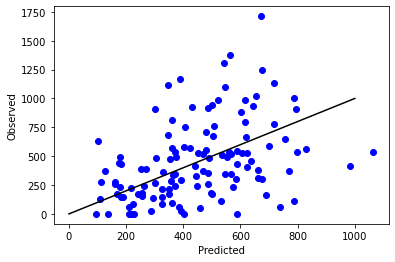

test data correlation coefficient is: 0.4123723691321375
train data correlation coefficient is: 0.9574407999848203


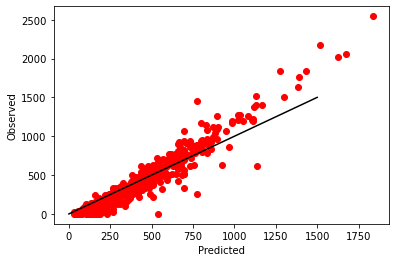

In [18]:
plt.scatter(y_pred, yargs_test, color = 'blue') ##label axes - x,y in order?
# plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 1000], [0, 1000], 'k-')
plt.show()

print('test data correlation coefficient is: ' + str(np.corrcoef(yargs_test, y_pred)[0, 1]))

train_pred = pipe.predict(xargs_train) ##Not sure if this is the right thing to do here
plt.scatter(train_pred, yargs_train, color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 1500], [0, 1500], 'k-')
plt.show

print('train data correlation coefficient is: ' + str(np.corrcoef(train_pred, yargs_train)[0, 1]))

In [19]:
##k-fold cross validation; similar to original random forest regression code

predictors = df1[['ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b', 'nd_r_g', 'wdrvi5', 'savi']]
targets = df1['liveMass'] 

from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold, cross_validate
from sklearn.datasets import load_boston

X, y = predictors, targets
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

model = pipe
scoring=('r2', 'neg_root_mean_squared_error')

cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)
cv_results

##from: https://stackoverflow.com/questions/55270431/how-to-correctly-perform-cross-validation-in-scikit-learn

{'fit_time': array([0.26716447, 0.24317694, 0.20742941, 0.23595166, 0.2835114 ]),
 'score_time': array([0.01561928, 0.00897694, 0.        , 0.01496029, 0.00302863]),
 'test_r2': array([-0.05618828,  0.03914343,  0.11958878,  0.13744162, -0.05490513]),
 'test_neg_root_mean_squared_error': array([-370.71919164, -345.02974263, -403.26170716, -318.85235832,
        -365.81370664])}

In [20]:
##Comparing with standard empirical model -- just uncomment and run

##sklearn - linear_regressor L1 weights look at these

print(len(xargs))
print(len(yargs))

print(xargs.head())

from sklearn import linear_model
import statsmodels.api as sm

regr = linear_model.LinearRegression()
regr.fit(xargs, yargs)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
xargs = sm.add_constant(xargs) ##adding a constant
 
model = sm.OLS(yargs, xargs).fit()
predictions = model.predict(xargs) 
 
print_model = model.summary()
print(print_model) ##check model assumptions

611
611
       ndvi  nd_swir2_r  nd_swir2_nir    nd_g_b    nd_r_g    wdrvi5      savi  \
0  0.499507    0.257923     -0.277311  0.209302 -0.012330  0.199369  0.283360   
1  0.529725    0.237044     -0.334710  0.206471  0.007605  0.238506  0.320546   
2  0.630313    0.138249     -0.539036  0.236742 -0.075783  0.375973  0.357125   
3  0.319794    0.321543      0.001950  0.175860  0.075982 -0.015155  0.183658   
4  0.525200    0.189242     -0.373034  0.212656  0.003025  0.232585  0.323952   

   Elevation      prcp          dayl       tmax       tmin        srad  \
0   0.476658  3.649863  43225.117188  20.414724  10.534066  311.316711   
1   0.396057  3.555687  43225.171875  20.326044  10.495000  311.353333   
2   0.833658  3.272280  43225.226562  19.987225  10.622115  310.501709   
3   0.744798  3.288764  43225.281250  20.177252  10.398517  312.960846   
4   0.107919  3.546236  43225.171875  20.336401  10.515385  311.112579   

            vp   sn_prcp       sn_dayl    sn_tmax    sn_tmin

In [21]:
##xgboost - seems to perform worse than random forest, at least with initial data
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## split data into X and y
xargs=df1[['ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b', 'nd_r_g', 'wdrvi5', 'savi', 'Elevation', \
           'prcp', 'dayl', 'tmax', 'tmin', 'srad', 'vp']]
yargs=df1['liveMass'] 

## split data into train and test sets
size_x = 0.2
seed = 0
x_xg_train, x_xg_test, y_xg_train, y_xg_test = train_test_split(xargs, yargs, test_size=size_x, random_state = seed)

##Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_xg_train = sc.fit_transform(x_xg_train)
x_xg_test = sc.transform(x_xg_test)

##fit model no training data
xg_reg = XGBClassifier()
xg_reg.fit(x_xg_train, y_xg_train)

##make predictions for test data
y_xg_pred = xg_reg.predict(x_xg_test)
# predictions = [round(value) for value in y_pred]

##evaluate predictions

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_xg_test, y_xg_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_xg_test, y_xg_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_xg_test, y_xg_pred)))

r_square = metrics.r2_score(y_xg_test, y_xg_pred)
print(r_square)
# print(reg_x.score(x_xg_test, y_xg_test))

# accuracy = accuracy_score(yargs_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

[09:18:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Mean Absolute Error: 341.0656260162602
Mean Squared Error: 207594.46762354474
Root Mean Squared Error: 455.62535884599833
-0.7585261491416213


RMSE value for k=  1 is: 444.85375978976447
RMSE value for k=  2 is: 389.181687952129
RMSE value for k=  3 is: 352.7820821770237
RMSE value for k=  4 is: 343.08662039095105
RMSE value for k=  5 is: 335.0590137255171
RMSE value for k=  6 is: 324.95096187757605
RMSE value for k=  7 is: 324.6650598583405
RMSE value for k=  8 is: 318.08438315105076
RMSE value for k=  9 is: 313.698884512326
RMSE value for k=  10 is: 320.38233088178305
RMSE value for k=  11 is: 321.0861141943808
RMSE value for k=  12 is: 317.1251833147642
RMSE value for k=  13 is: 319.41979068119247
RMSE value for k=  14 is: 320.50319718100934
RMSE value for k=  15 is: 321.8079462484881
RMSE value for k=  16 is: 320.2498138399859
RMSE value for k=  17 is: 320.5017918868183
RMSE value for k=  18 is: 322.1867090443774
RMSE value for k=  19 is: 322.86426450319345
RMSE value for k=  20 is: 323.49481933410186


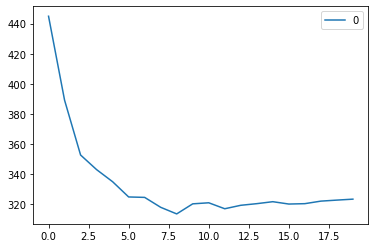

In [22]:
##KNN - be careful of site bias!! Data are spatially clustered based on site, also temporally clustered based on year

##Careful of overlap in variable names!

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

k_xargs=df1[
    [
        'ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b', 'nd_r_g', 'wdrvi5', 'savi', 'Elevation', 'prcp', 'dayl', 'tmax', 
        'tmin','srad', 'vp'
    ]
]

##Include lag variables (e.g. lag ndvi), precip, temp, more

k_yargs=df1['liveMass'] 

size_x = 0.2
seed = 0

k_xargs_train, k_xargs_test, k_yargs_train, k_yargs_test = train_test_split(
    k_xargs, k_yargs, test_size=size_x, random_state = seed
)

## 80% training and 20% test

## Feature Scaling - does something weird with k values, what does that mean? Use minmax scaler instead (below), as in example?

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
k_xargs_train = scaler.fit_transform(k_xargs_train)
k_xargs_test = scaler.fit_transform(k_xargs_test)

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    k_model = neighbors.KNeighborsRegressor(n_neighbors = K)

    k_model.fit(k_xargs_train, k_yargs_train)  #fit the model
    k_pred=k_model.predict(k_xargs_test) #make prediction on test set
    k_error = sqrt(mean_squared_error(k_yargs_test, k_pred)) #calculate rmse
    rmse_val.append(k_error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', k_error)
    
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot() 

k_predict = k_model.predict(k_xargs_test)
##from: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/


RMSE for KNN is: 313.698884512326


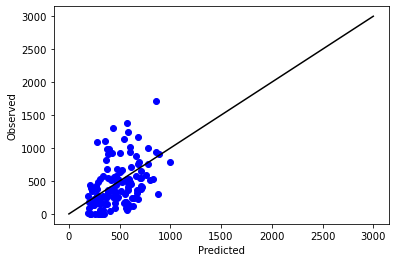

test data correlation coefficient is: 0.4273776267877875
train data correlation coefficient is: 0.5354423405366023


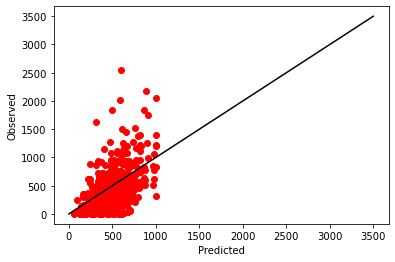

In [23]:
##KNN test results, plotted (careful of variable names overlap)
k_model = neighbors.KNeighborsRegressor(n_neighbors = 9)
k_model.fit(k_xargs_train, k_yargs_train)  #fit the model
k_pred=k_model.predict(k_xargs_test) #make prediction on test set
k_error = sqrt(mean_squared_error(k_yargs_test, k_pred))
print('RMSE for KNN is: ' + str(k_error))

plt.scatter(k_pred, k_yargs_test, color = 'blue') ##label axes - x,y in order?
# plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 3000], [0, 3000], 'k-')
plt.show()

print('test data correlation coefficient is: ' + str(np.corrcoef(k_yargs_test, k_pred)[0, 1]))

k_train_pred = k_model.predict(k_xargs_train) 
plt.scatter(k_train_pred, k_yargs_train, color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 3500], [0, 3500], 'k-')
plt.show

print('train data correlation coefficient is: ' + str(np.corrcoef(k_train_pred, k_yargs_train)[0, 1]))

##Odd that the training data is not better